In [5]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns

FILE_PATH = '../clean_data.csv';

TRAIN_TO_TEST_RATIO = 0.8
TRAIN_FILE_NAME = '../data/train.csv'
TEST_FILE_NAME = '../data/test.csv'
CORR_FILE_NAME = '../data/corr.png'


In [6]:
data = pn.read_csv(FILE_PATH)
selection = np.random.randn(len(data)) < TRAIN_TO_TEST_RATIO

train = data[selection]
test = data[~selection]

In [7]:
train.describe()

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
count,797.000000,797.000000,797.000000,797.000000,7.970000e+02,797.000000,797.000000,797.000000,797.000000
mean,1.499889,17.514390,924.975594,5.943435,1.255591e+06,1.029878,191.474932,425.706399,1.472066
std,0.029017,4.317013,14.376364,2.307534,4.338396e+05,0.549192,63.274620,32.632332,0.027392
min,1.450000,10.000000,900.000000,2.000000,5.000000e+05,0.100000,80.000000,345.000000,1.418000
25%,1.474800,13.739900,912.690800,3.958800,8.837714e+05,0.546300,137.575400,401.333300,1.449200
50%,1.500400,17.569800,924.781000,5.930700,1.260871e+06,1.042100,192.895600,420.333300,1.473000
75%,1.525000,21.228700,937.450200,7.914900,1.631785e+06,1.494800,245.936300,453.000000,1.495100
max,1.550000,25.000000,950.000000,10.000000,2.000000e+06,2.000000,300.000000,488.666700,1.522800


In [8]:
train.sample(5)

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
940,1.4581,19.3874,937.3249,6.4769,1.390667e+06,0.6783,92.3534,415.3333,1.4355
541,1.4648,20.1271,929.8484,5.1456,7.359718e+05,1.8878,260.6265,412.6667,1.4427
947,1.5067,23.8155,907.0163,5.9155,7.149600e+05,0.3151,168.1592,354.3333,1.4788
762,1.4694,11.3938,941.4050,3.7223,1.924785e+06,1.1829,243.4918,479.0000,1.4408
316,1.5457,11.6313,938.3740,3.8003,7.378975e+05,0.4513,141.8180,485.0000,1.5088


In [9]:
def norm(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data_norm = norm(data)
data_norm.describe()

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.500019,0.500008,0.499979,0.500009,0.500005,0.500006,0.500005,0.586283,0.517475
std,0.289372,0.289343,0.289360,0.289323,0.289357,0.289361,0.289358,0.214790,0.260433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249500,0.249580,0.249829,0.249425,0.249832,0.249500,0.249452,0.427473,0.307252
50%,0.500000,0.499553,0.500350,0.499700,0.499790,0.499632,0.499899,0.553846,0.518130
75%,0.750500,0.750427,0.750293,0.750063,0.749908,0.750632,0.750665,0.765934,0.735687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_norm.sample(5)

,thickness,TransportTimeAfterHeating,EnforcedTemperatureOfEntireSheet,QuenchingTimeInTool,QuenchingForce,spacing,DefaultToolTemperature,HARDNESS P1,THICKNESS P2
909,0.790,0.562753,0.382096,0.175875,0.652659,0.309000,0.365339,0.421978,0.785305
947,0.567,0.921033,0.140326,0.489437,0.143307,0.113211,0.400724,0.114285,0.580153
479,0.361,0.940153,0.521090,0.470337,0.402176,0.715105,0.806343,0.285714,0.421756
594,0.229,0.848193,0.849614,0.501975,0.886850,0.866421,0.188740,0.589011,0.304389
839,0.490,0.664620,0.266354,0.895175,0.253333,0.573579,0.276151,0.428571,0.540076


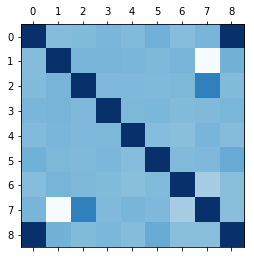

In [12]:
plt.matshow(data_norm.corr(method='pearson'), cmap='Blues', interpolation='nearest')

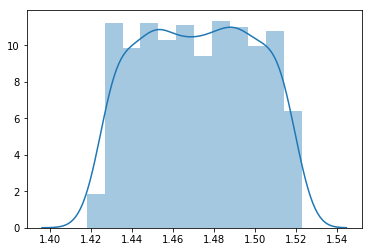

In [96]:
# THICKNESS P2
sns.distplot(data.loc[:,['THICKNESS P2']])

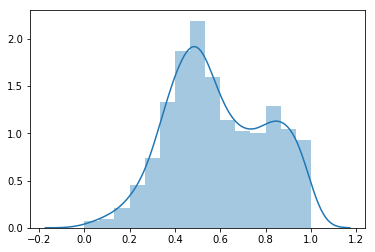

In [98]:
# HARNESS P1
sns.distplot(data_norm.iloc[:,[7]])
# sns.distplot(data.loc[:,['HARDNESS P1']])

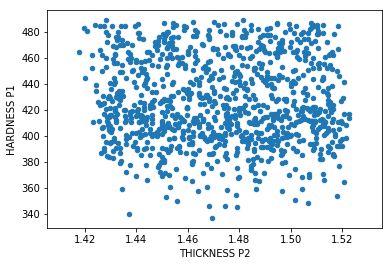

In [99]:
targets = data.loc[:,['HARDNESS P1', 'THICKNESS P2']]
targets.plot.scatter(y='HARDNESS P1', x='THICKNESS P2')